<a href="https://colab.research.google.com/github/irgisatriomandega/irgisatriomandega/blob/main/SNR_%26_P_Receive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Irgi Satrio Mandega/ TT43-INT / 1101192466**
         
SNR, PRx, and Cellular Capacity

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
dmin=300 #m
dmax=1000 #m
N=200 #banyak titik
d=np.random.randint(dmin,dmax,N)

f=1800 #MHz
locur="urban"
locsur="suburban"
locop="open"
tower=80 #m
user=1.5 #m

f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz

In [4]:
LpUrban=cos(f,locur,tower,user,d)
LpSubUrban=cos(f,locsur,tower,user,d)
LpOpen=cos(f,locop,tower,user,d)

In [5]:
Lpf1=cos(f1,locur,tower,user,d)
Lpf2=cos(f2,locur,tower,user,d)
Lpf3=cos(f3,locur,tower,user,d)

**Daya Terima**

In [6]:
def prx(ptx,pl,gtx,grx):
  plogterima=10*(np.log10(ptx))-pl+gtx+grx ##ptx diubah dari mW ke dBm lalu dijumlahkan semua dengan Db lain
  pnumterima=10**(plogterima/10) ##hasil nya diubah kembali ke bentuk mW
  return pnumterima

In [7]:
ptx = 30*10**3 #mW
gtx = 10 #dB
grx = 2 #dB

#PRx Area
prxUrban = prx(ptx,LpUrban,gtx,grx)
prxSubUrban = prx(ptx,LpSubUrban,gtx,grx)
prxOpen = prx(ptx,LpOpen,gtx,grx)

#PRx Freq
prxf1 = prx(ptx,Lpf1,gtx,grx)
prxf2 = prx(ptx,Lpf2,gtx,grx)
prxf3 = prx(ptx,Lpf3,gtx,grx)

In [8]:
d_sort = d[np.argsort(d)]
prxUrban_sort=prxUrban[np.argsort(d)]
prxSub_Urban_sort=prxSubUrban[np.argsort(d)]
prxOpen_sort=prxOpen[np.argsort(d)]

d_sort = d[np.argsort(d)]
prxf1_sort=prxf1[np.argsort(d)]
prxf2_sort=prxf2[np.argsort(d)]
prxf3_sort=prxf3[np.argsort(d)]

<Figure size 432x288 with 0 Axes>

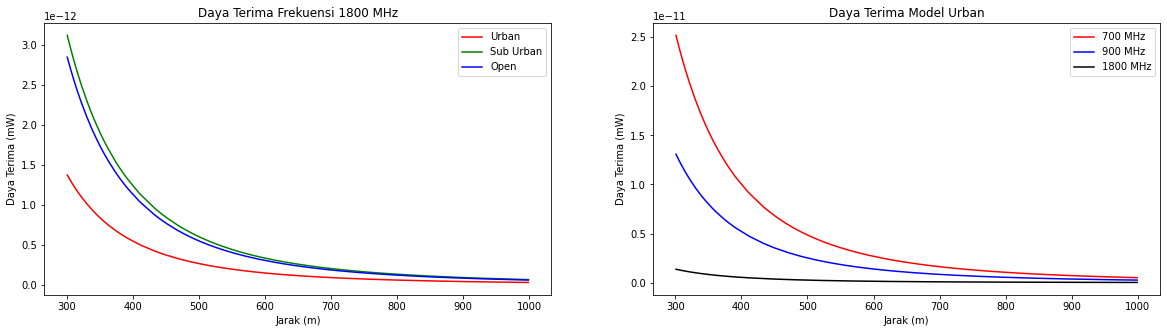

In [9]:
plt.figure()
fig,(sb1,sb2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))

sb1.set_title("Daya Terima Frekuensi 1800 MHz")
sb1.plot(d_sort,prxUrban_sort, 'r', label='Urban')
sb1.plot(d_sort,prxSub_Urban_sort,'g', label='Sub Urban')
sb1.plot(d_sort,prxOpen_sort, 'b',label='Open')
sb1.set_xlabel('Jarak (m)')
sb1.set_ylabel('Daya Terima (mW)')
sb1.legend()

sb2.set_title("Daya Terima Model Urban")
sb2.plot(d_sort,prxf1_sort, 'r', label="700 MHz")
sb2.plot(d_sort,prxf2_sort, 'b',label="900 MHz")
sb2.plot(d_sort,prxf3_sort, 'k', label="1800 MHz")
sb2.set_xlabel('Jarak (m)')
sb2.set_ylabel('Daya Terima (mW)')
sb2.legend()

plt.show()

**Signal to Noise Ratio**

In [10]:
def snr(bw,pnumterima):
  noilog=-174+10*np.log10(bw) ##noise diubah dari numerik ke logaritmik
  noinum=10**(noilog/10) ##noise diubah dari logaritmik ke numerik
  snr=pnumterima/noinum
  return snr

In [11]:
bw = 5*10**6 #Hz

#SNR Area
snrUrban = snr(bw,prxUrban)
snrSubUrban = snr(bw,prxSubUrban)
snrOpen = snr(bw,prxOpen)

#SNR Freq
snrf1 = snr(bw,prxf1)
snrf2 = snr(bw,prxf2)
snrf3 = snr(bw,prxf3)

In [12]:
d_sort = d[np.argsort(d)]
snrUrban_sort=snrUrban[np.argsort(d)]
snrSub_Urban_sort=snrSubUrban[np.argsort(d)]
snrOpen_sort=snrOpen[np.argsort(d)]

d_sort = d[np.argsort(d)]
snrf1_sort=snrf1[np.argsort(d)]
snrf2_sort=snrf2[np.argsort(d)]
snrf3_sort=snrf3[np.argsort(d)]

<Figure size 432x288 with 0 Axes>

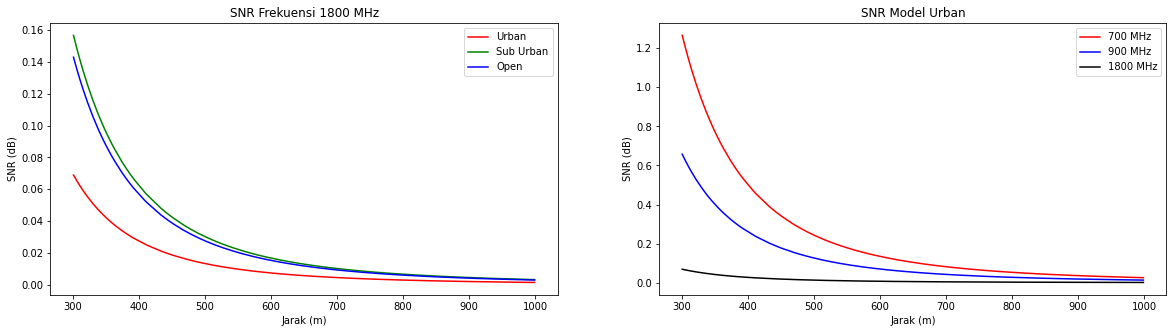

In [13]:
plt.figure()
fig,(sb1,sb2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))

sb1.set_title("SNR Frekuensi 1800 MHz")
sb1.plot(d_sort,snrUrban_sort, 'r', label='Urban')
sb1.plot(d_sort,snrSub_Urban_sort,'g', label='Sub Urban')
sb1.plot(d_sort,snrOpen_sort, 'b',label='Open')
sb1.set_xlabel('Jarak (m)')
sb1.set_ylabel('SNR (dB)')
sb1.legend()

sb2.set_title("SNR Model Urban")
sb2.plot(d_sort,snrf1_sort, 'r', label="700 MHz")
sb2.plot(d_sort,snrf2_sort, 'b',label="900 MHz")
sb2.plot(d_sort,snrf3_sort, 'k', label="1800 MHz")
sb2.set_xlabel('Jarak (m)')
sb2.set_ylabel('SNR (dB)')
sb2.legend()

plt.show()

**Cellular Capacity**

In [14]:
def cell(snr,bw):
  sell=bw*np.log2(1+snr)
  return sell

In [15]:
bw = 5*10**6 #Hz

#SNR Area
cellUrban = cell(bw,snrUrban)
cellSubUrban = cell(bw,snrSubUrban)
cellOpen = cell(bw,snrOpen)

#SNR Freq
cellf1 = cell(bw,snrf1)
cellf2 = cell(bw,snrf2)
cellf3 = cell(bw,snrf3)

In [16]:
d_sort = d[np.argsort(d)]
cellUrban_sort=cellUrban[np.argsort(d)]
cellSub_Urban_sort=cellSubUrban[np.argsort(d)]
cellOpen_sort=cellOpen[np.argsort(d)]

d_sort = d[np.argsort(d)]
cellf1_sort=cellf1[np.argsort(d)]
cellf2_sort=cellf2[np.argsort(d)]
cellf3_sort=cellf3[np.argsort(d)]

<Figure size 432x288 with 0 Axes>

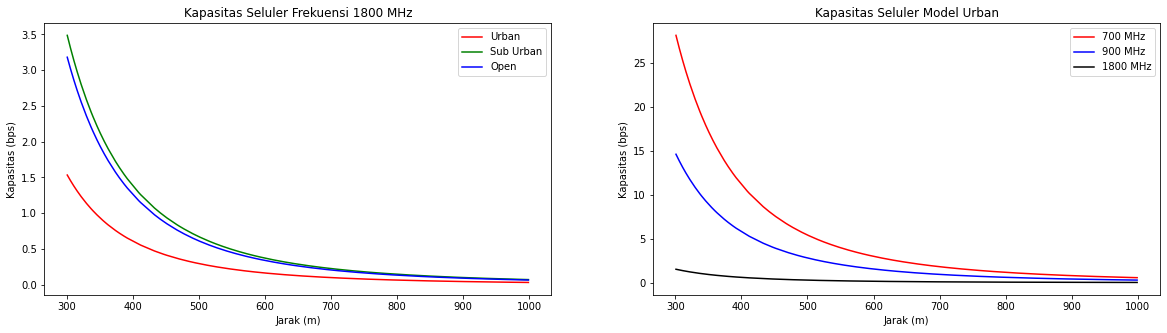

In [17]:
plt.figure()
fig,(sb1,sb2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))

sb1.set_title("Kapasitas Seluler Frekuensi 1800 MHz")
sb1.plot(d_sort,cellUrban_sort, 'r', label='Urban')
sb1.plot(d_sort,cellSub_Urban_sort,'g', label='Sub Urban')
sb1.plot(d_sort,cellOpen_sort, 'b',label='Open')
sb1.set_xlabel('Jarak (m)')
sb1.set_ylabel('Kapasitas (bps)')
sb1.legend()

sb2.set_title("Kapasitas Seluler Model Urban")
sb2.plot(d_sort,cellf1_sort, 'r', label="700 MHz")
sb2.plot(d_sort,cellf2_sort, 'b',label="900 MHz")
sb2.plot(d_sort,cellf3_sort, 'k', label="1800 MHz")
sb2.set_xlabel('Jarak (m)')
sb2.set_ylabel('Kapasitas (bps)')
sb2.legend()

plt.show()